In [13]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit
import os

In [3]:
df_mv = pd.read_csv("meanVariances.csv", index_col = [0])
#df_mv = df_mv.loc[df_mv['type_of_gene']=='protein-coding']
df_mv.head()

,mean,type_of_gene,variance,occurrence
ENSG00000242268,0.614475,intergenic,0.894091,1254.0
ENSG00000270112,0.345251,unknown,0.160361,298.0
ENSG00000167578,3.861120,protein-coding,6.342790,4999.0
ENSG00000273842,0.436278,unknown,0.190666,81.0
ENSG00000078237,4.459130,protein-coding,17.953300,4997.0


In [4]:
means = df_mv['mean'].values
variances = df_mv['variance'].values
occurrences = np.array(df_mv['occurrence'].values, dtype=long)
len(means)

NameError: name 'long' is not defined

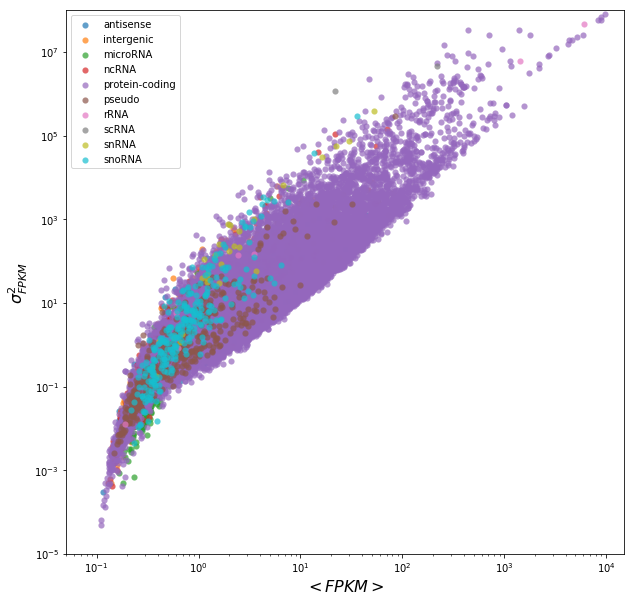

In [5]:
## Plot by class

types_of_gene = np.unique(df_mv['type_of_gene'].values)
types_of_gene

xscale='log'
yscale='log'
fig = plt.figure(figsize=(10,10))
#['ncRNA', 'rRNA', 'scRNA', 'snRNA', 'snoRNA']
for type_of_gene in types_of_gene[:-1]:
    subdf = df_mv[df_mv['type_of_gene']==type_of_gene]
    plt.scatter(subdf['mean'], subdf['variance'], label = type_of_gene, marker='o', alpha=0.7, linewidths=0.1)
plt.xlabel("$<FPKM>$", fontsize=16)
plt.ylabel("$\sigma^2_{FPKM}$", fontsize=16)
plt.yscale(yscale)
plt.xscale(xscale)
plt.ylim(1e-5, 1e8)
plt.xlim(5e-2, 1.5e4)
plt.legend()
plt.show()
fig.savefig('allgenes_classes_known_'+yscale+xscale+'.png')

ValueError: 'c' argument has 3 elements, which is not acceptable for use with 'x' with size 273, 'y' with size 273.

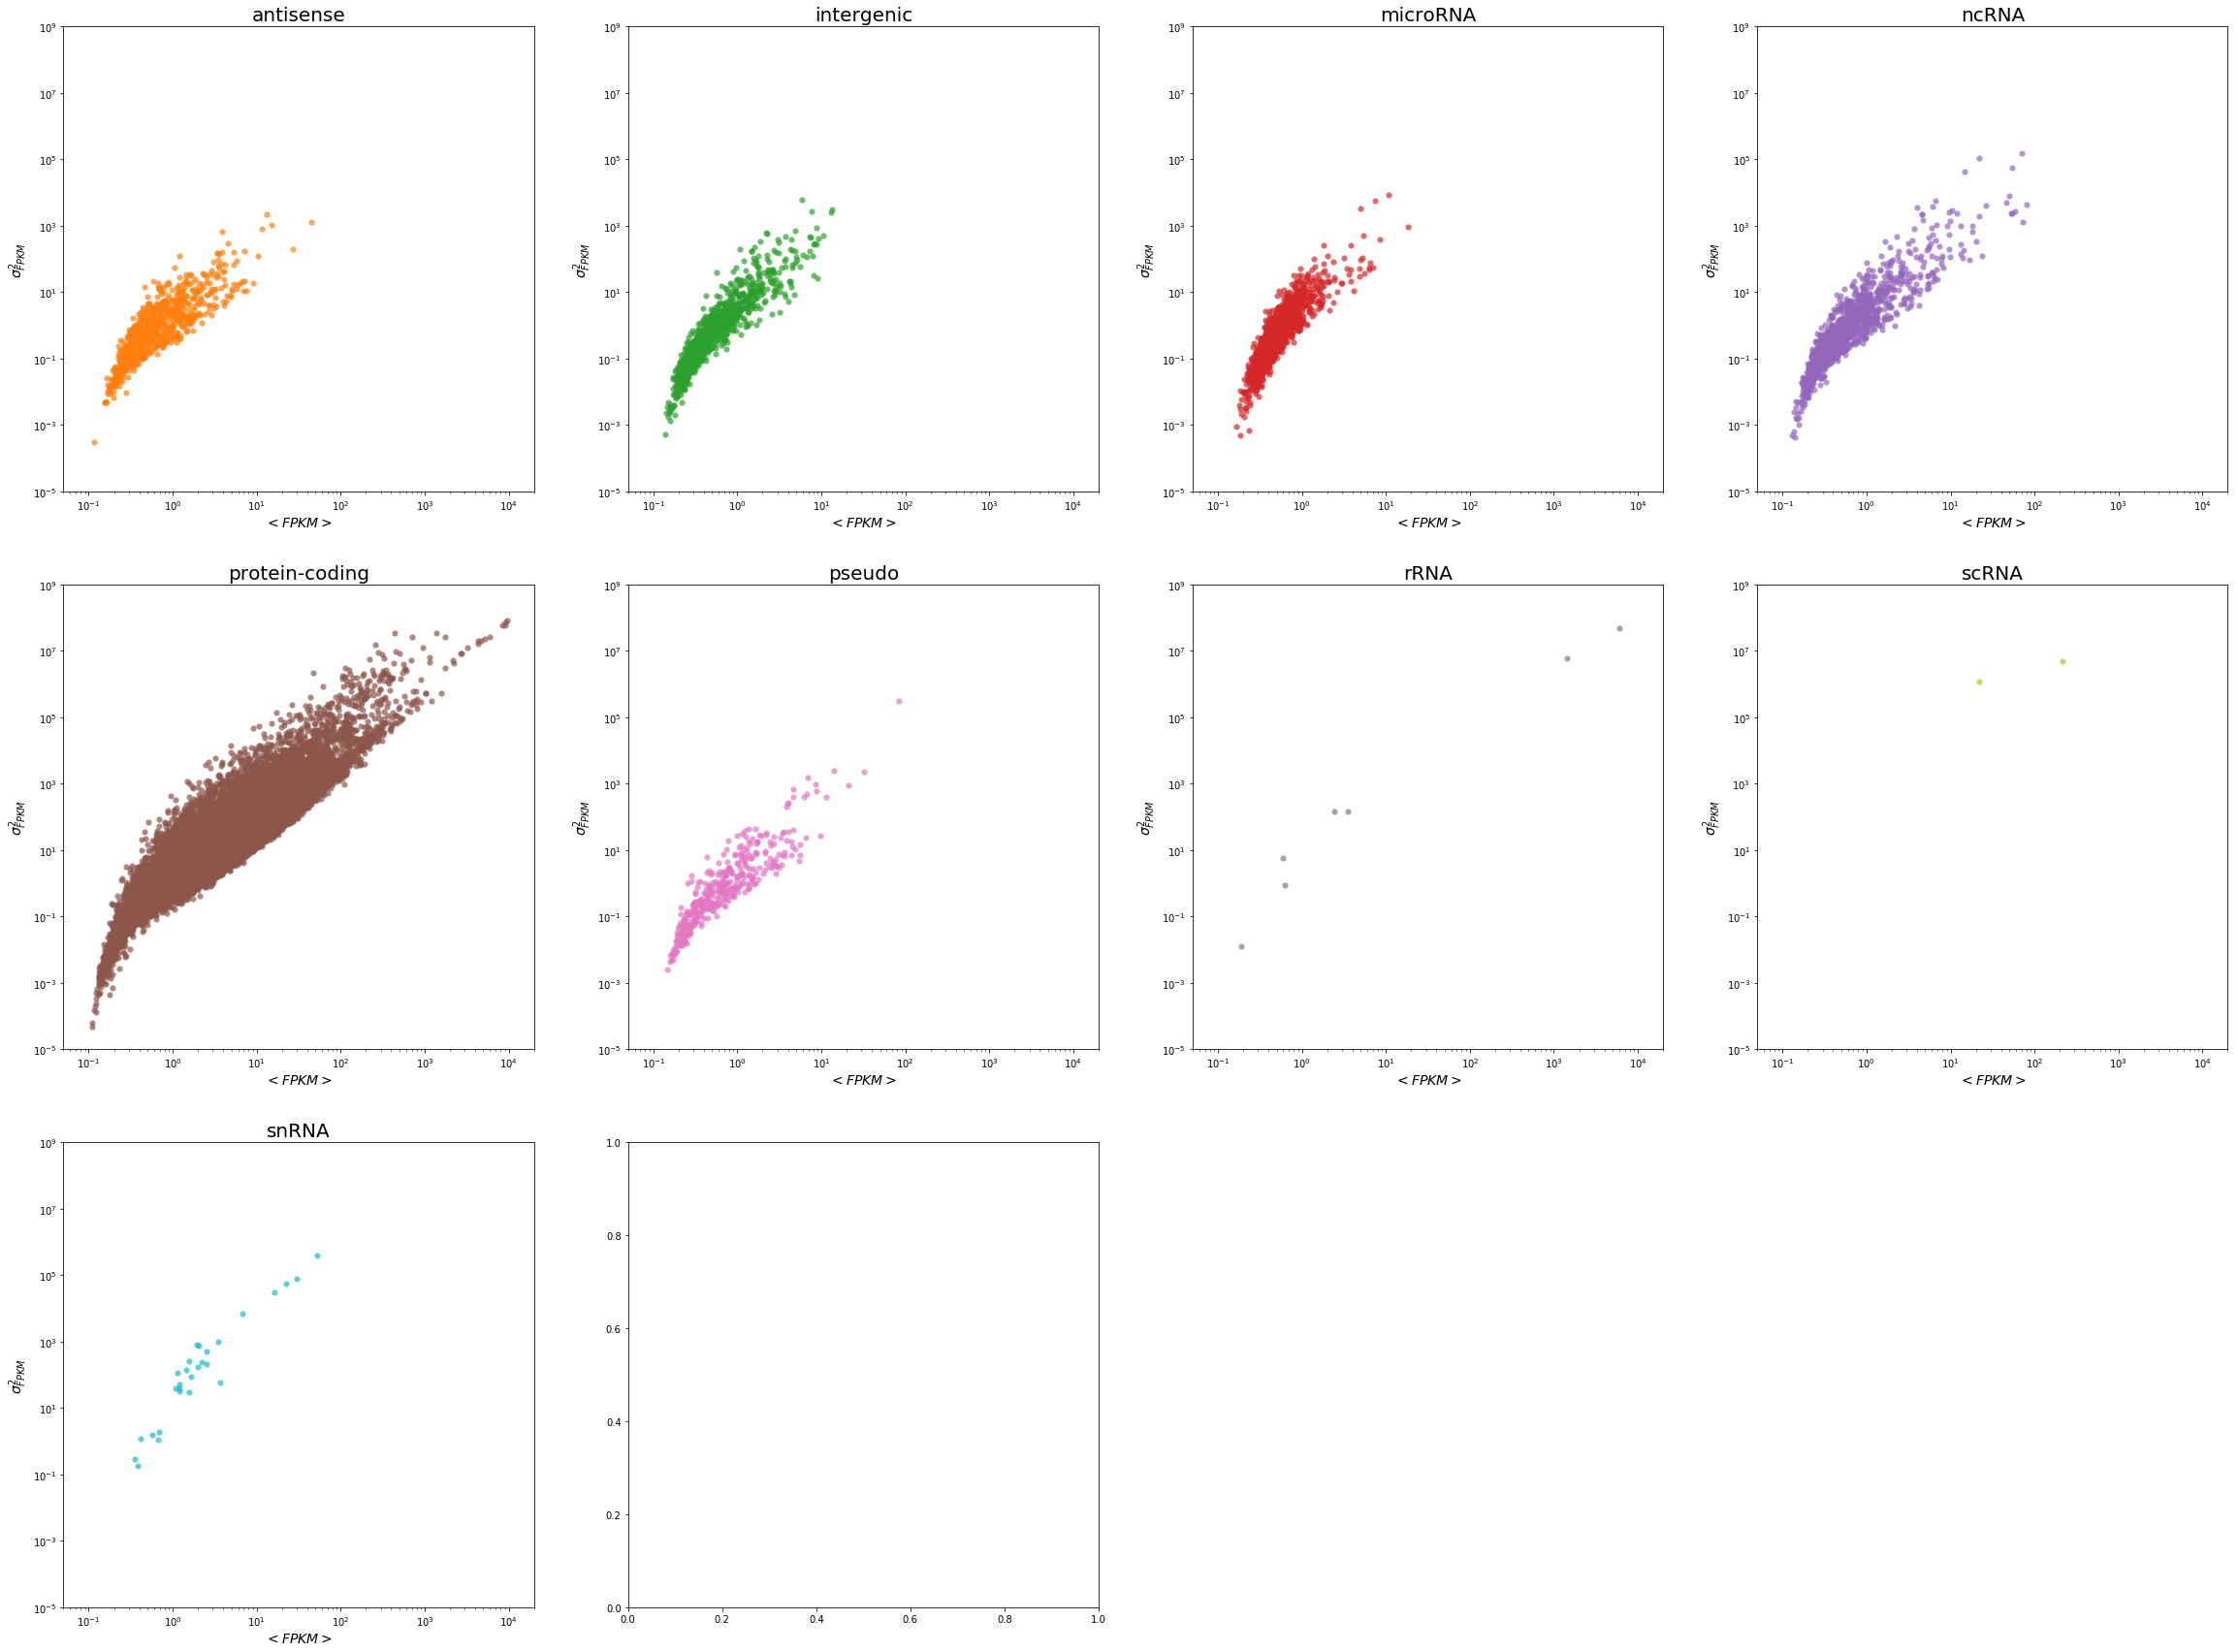

In [6]:
xscale='log'
yscale='log'
fig = plt.figure(figsize=(40,30))
pindex = 1
for type_of_gene in types_of_gene:
    ax = plt.subplot(3,4,pindex)
    subdf = df_mv[df_mv['type_of_gene']==type_of_gene]
    ax.scatter(subdf['mean'], subdf['variance'], label = type_of_gene, marker='o', alpha=0.7, linewidths=0.1, c='C'+str(pindex))
    ax.set_title(type_of_gene, fontsize=20)
    plt.xlabel("$<FPKM>$", fontsize=14)
    plt.ylabel("$\sigma^2_{FPKM}$", fontsize=14)
    plt.yscale(yscale)
    plt.xscale(xscale)
    plt.ylim(1e-5, 1e9)
    plt.xlim(5e-2, 2e4)
    pindex+=1
plt.show()
fig.savefig('allgenes_perclasses_'+yscale+xscale+'.png')

## specific class

In [7]:
type_of_gene = 'protein-coding'
xscale='log'
yscale='log'
n_bins=30
subdf = df_mv[df_mv['type_of_gene']==type_of_gene]

1.8201361474427464


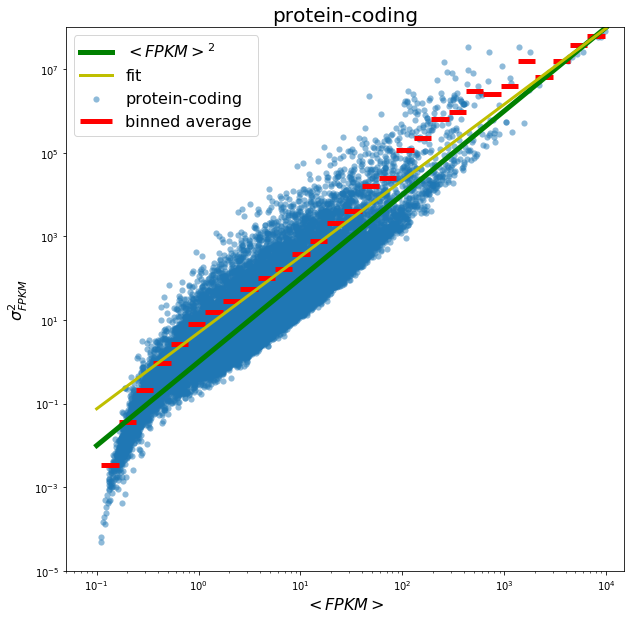

In [8]:
fig = plt.figure(figsize=(10,10))
x_lin = np.logspace(-1,4, dtype=float)
x = subdf['mean']
y = subdf['variance']
plt.scatter(x, y, label = type_of_gene, marker='o', alpha=0.5, linewidths=0.1)

log_bins_for_x = np.logspace(np.log10(np.min(x)), np.log10(np.max(x)), num=n_bins)
bin_means, bin_edges, binnumber = stats.binned_statistic(x, y, statistic='mean', bins=log_bins_for_x)
bin_centres = (bin_edges[:-1]+bin_edges[1:])/2
plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='r', lw=5, label='binned average')

plt.plot(x_lin,np.power(x_lin,2), 'g-', lw=5, label='$<FPKM>^2$')

popt, pcov = curve_fit(lambda x,a,b : a*np.power(x,b), bin_centres, bin_means, bounds=(1,5))
plt.plot(x_lin, popt[0]*np.power(x_lin, popt[1]), color='y', lw=3, label='fit')
print(popt[1])


plt.xlabel("$<FPKM>$", fontsize=16)
plt.ylabel("$\sigma^2_{FPKM}$", fontsize=16)
plt.yscale(yscale)
plt.xscale(xscale)
plt.ylim(1e-5, 1e8)
plt.xlim(5e-2, 1.5e4)
plt.title(type_of_gene, fontsize=20)
plt.legend(fontsize=16)
plt.show()
fig.savefig('%s_'%type_of_gene+yscale+xscale+'.png')

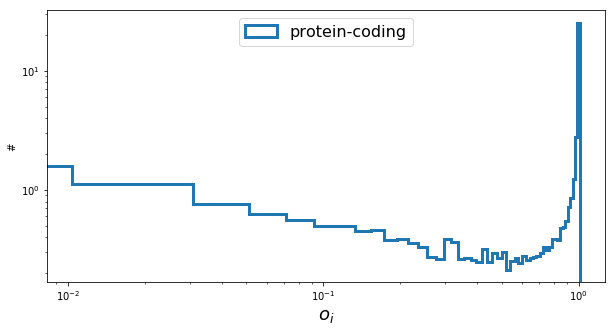

In [10]:
bins = 50
rang = (0-0.5/bins, 1+0.5/bins)
fig = plt.figure(figsize=(10,5))
subdf = df_mv[df_mv['type_of_gene']==type_of_gene]
plt.hist(subdf['occurrence']/5000, label=type_of_gene, histtype='step', density=True, bins=bins, range=rang, lw=3)
plt.legend(fontsize=16, loc='upper center')
plt.xlabel("$o_i$", fontsize=18)
plt.ylabel("#")
plt.yscale('log')
plt.xscale('log')
plt.show()
fig.savefig("U_%s.pdf"%type_of_gene)

In [15]:
with open("ontology.txt", 'w') as g_file:
    g_file.writelines(["%s\n" % item  for item in df_mv[df_mv['occurrence']>0.9*5000].index.values])

## U

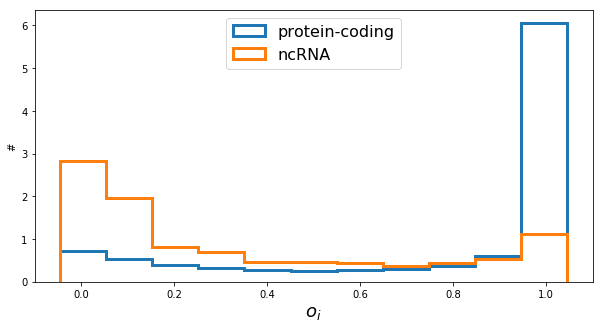

In [17]:
bins = 11
rang = (0-0.5/bins, 1+0.5/bins)
fig = plt.figure(figsize=(10,5))
for t in ['protein-coding', 'ncRNA']:
    subdf = df_mv[df_mv['type_of_gene']==t]
    plt.hist(subdf['occurrence']/5000, label=t, histtype='step', density=True, bins=bins, range=rang, lw=3)
plt.legend(fontsize=16, loc='upper center')
plt.xlabel("$o_i$", fontsize=18)
plt.ylabel("#")
plt.show()
fig.savefig("multiplecnc.pdf")